In [1]:
# read in data
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

In [2]:
df.drop(df[df['horsepower']=='?'].index,inplace=True)

df['horsepower']=df['horsepower'].astype('float64')
df.dtypes

df['car_name'] = df['car_name'].apply(lambda x: x.split()[0])

# fix errors in data
df.replace('vokswagen','volkswagen',inplace=True)
df.replace('vw','volkswagen',inplace=True)
df.replace('toyouta','toyota',inplace=True)
df.replace('mercedes','mercedes-benz',inplace=True)
df.replace('maxda','mazda',inplace=True)
df.replace('chevroelt','chevrolet',inplace=True)
df.replace('chevy','chevrolet',inplace=True)
df.replace('hi','ih',inplace=True)
df.index=range(0, 392)

In [3]:
min_wt = min(df['weight'])
max_wt = max(df['weight'])
per_bin = (max_wt - min_wt)/3

bin1_start = min(df['weight'])
bin1_end = bin1_start + per_bin
bin2_end = bin1_end + per_bin

def label_wt(row):
    if bin1_start <= row['weight'] and row['weight'] <= bin1_end:
        return 'light'
    elif row['weight'] <= bin2_end:
        return 'medium'
    else:
        return 'heavy'
df['weight_categ'] = df.apply(lambda row: label_wt(row),axis=1)

**1:**

The following code shuffles the dataframe and then takes the first 70% of values (275) for training and rest for testing set

In [4]:
randomised = df.sample(frac=1)
train = randomised[:275]
test = randomised[275:]

train.index=range(0, 275)
test.index=range(0, 117)

In [5]:
class LinearRegression:
    #constructor to initialize the coefficient array
    def __init__(self):
        self.b = []
        
    def fit(self,x,y,order):
        N = len(x)
        if order == 0:
            X = np.c_[np.ones(N)]
        elif order == 1:
            X = np.c_[np.ones(N),x]
        elif order == 2:
            X = np.c_[np.ones(N),x,np.square(x)]
        else:
            X = np.c_[np.ones(N),x,np.square(x),np.power(x,3)]
#         print(X)
        # print(X.T@X)
        # print(X.T@y@np.linalg.inv(X.T@X))
        self.b = X.T@y@np.linalg.pinv(X.T@X)

    def predict(self,x):
#         print(self.b)
        prediction = []
        for i in range(len(x)):
            pred = self.b[0]
            for j in range(1,len(self.b)):
                
                pred+=self.b[j]*np.power(x[i],j)
                
                #if(x[i] == 14 and j==3):
                 #   print (pred, " here")
            prediction.append(pred)
        return prediction
    
    def mse(self,y,prediction):
        s = 0
        for i in range(len(y)):
            s+=(y[i]-prediction[i])**2
        score = s/len(y)
        return score

(b), (c), and (d) are all solved in the following cell. 

MSE values are calculated then printed (and are thus used to find the best data), and then the lines are plotted according to the x values and order. 

(mpg, 0)             668345.404956
(cylinders, 0)       668345.404956
(displacement, 0)    668345.404956
(horsepower, 0)      668345.404956
(acceleration, 0)    668345.404956
(model_year, 0)      668345.404956
(origin, 0)          668345.404956
(mpg, 1)             246291.509761
(cylinders, 1)       131864.973080
(displacement, 1)     76098.797677
(horsepower, 1)      147005.633286
(acceleration, 1)    574713.068193
(model_year, 1)      663435.307415
(origin, 1)          457148.626272
(mpg, 2)             175120.851076
(cylinders, 2)       133049.640731
(displacement, 2)     73788.279426
(horsepower, 2)      142882.380360
(acceleration, 2)    536321.151315
(model_year, 2)      651587.177326
(origin, 2)          440717.114222
(mpg, 3)             172847.893903
(cylinders, 3)       131222.825006
(displacement, 3)     76895.395654
(horsepower, 3)      140679.665210
(acceleration, 3)    563442.067391
(model_year, 3)      651419.304224
(origin, 3)          440717.114222
dtype: float64
mpg
c

<Figure size 432x288 with 0 Axes>

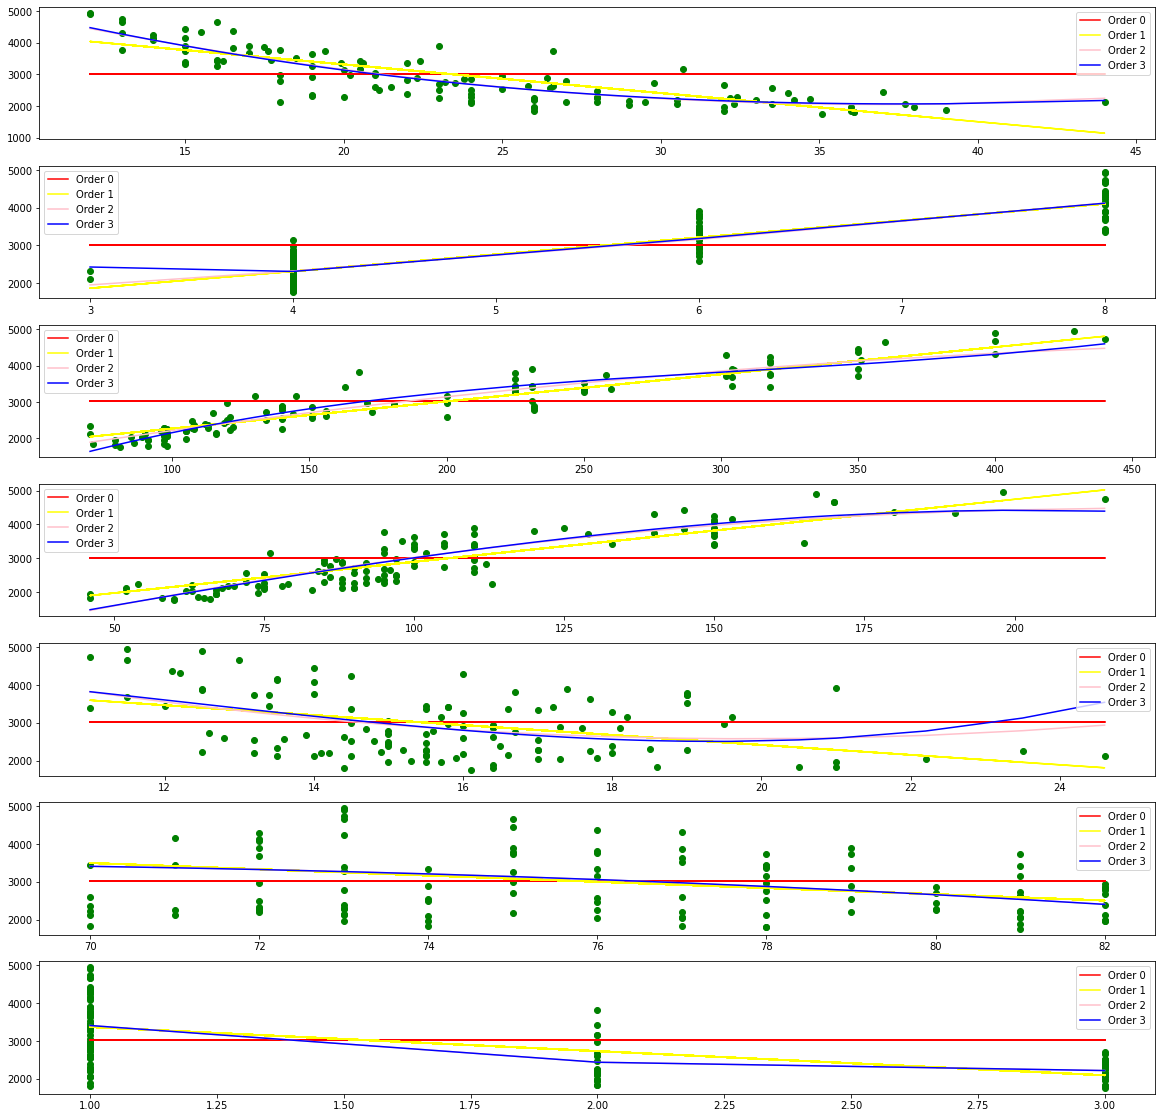

In [6]:
import matplotlib.pyplot as plt
test_df = pd.DataFrame() # for storing the predictions for the plots
mse_values = pd.DataFrame() # for storing the different mse values for each order and x value
for i in range(0,4):
    for key, value in df.iteritems():
        if key == "car_name" or key == "car_maker" or key == "weight" or key == "weight_categ":
            continue
        else:
            # print(key, i, len(train[key].to_list()))
            L = LinearRegression()
            fit = LinearRegression.fit(L, train[key].to_list(), train["weight"].to_list(), i)
            predict = LinearRegression.predict(L, test[key].to_list())
            mse = LinearRegression.mse(L, test["weight"].to_list(), predict)
            mse_values[key,i] = [mse]
            test_df[key, i] = predict 


print(mse_values.min())

plt.figure()
plt.rcParams["figure.figsize"] = (20,20)
fig, axs = plt.subplots(7, 1)
cnt = -1

for key, value in test.iteritems():
        if key == "car_name" or key == "car_maker" or key == "weight" or key == "weight_categ":
            continue
        else:
            cnt = cnt + 1
            zipped_lists = zip(test[key].to_list(), test_df[key, 2].to_list())
            sorted_zipped_lists = sorted(zipped_lists)
            mylist = list(dict.fromkeys(sorted_zipped_lists))
            A, B = zip(*mylist)
            
            zipped_lists = zip(test[key].to_list(), test_df[key, 3].to_list())
            sorted_zipped_lists = sorted(zipped_lists)
            mylist = list(dict.fromkeys(sorted_zipped_lists))
            C, D = zip(*mylist)
            
            print(key)
            
            axs[cnt].plot(test[key], test_df[key, 0], color = 'red')
            axs[cnt].plot(test[key], test_df[key, 1], color = 'yellow')
            axs[cnt].plot(A, B, color = 'pink')
            axs[cnt].plot(C, D, color = 'blue')
            axs[cnt].legend(["Order 0", 'Order 1', "Order 2", "Order 3"])
            axs[cnt].scatter(test[key], test["weight"], color = 'green')
            

Third order displacement seems to perform the best, with the lowest mse value. 


(mpg, 0)             647839.531866
(cylinders, 0)       647839.531866
(displacement, 0)    647839.531866
(horsepower, 0)      647839.531866
(acceleration, 0)    647839.531866
(model_year, 0)      647839.531866
(origin, 0)          647839.531866
(mpg, 1)             250988.419791
(cylinders, 1)       126364.706552
(displacement, 1)     64961.328735
(horsepower, 1)      147274.519877
(acceleration, 1)    569994.239916
(model_year, 1)      659153.205568
(origin, 1)          451300.193482
(mpg, 2)             191836.201941
(cylinders, 2)       127956.054641
(displacement, 2)     63154.618166
(horsepower, 2)      142012.097821
(acceleration, 2)    521730.554145
(model_year, 2)      641142.409435
(origin, 2)          432764.898190
(mpg, 3)             188853.920377
(cylinders, 3)       125449.026501
(displacement, 3)     67712.651043
(horsepower, 3)      140048.343851
(acceleration, 3)    532268.698559
(model_year, 3)      640800.305542
(origin, 3)          432764.898190
dtype: float64
mpg
c

<Figure size 1440x1440 with 0 Axes>

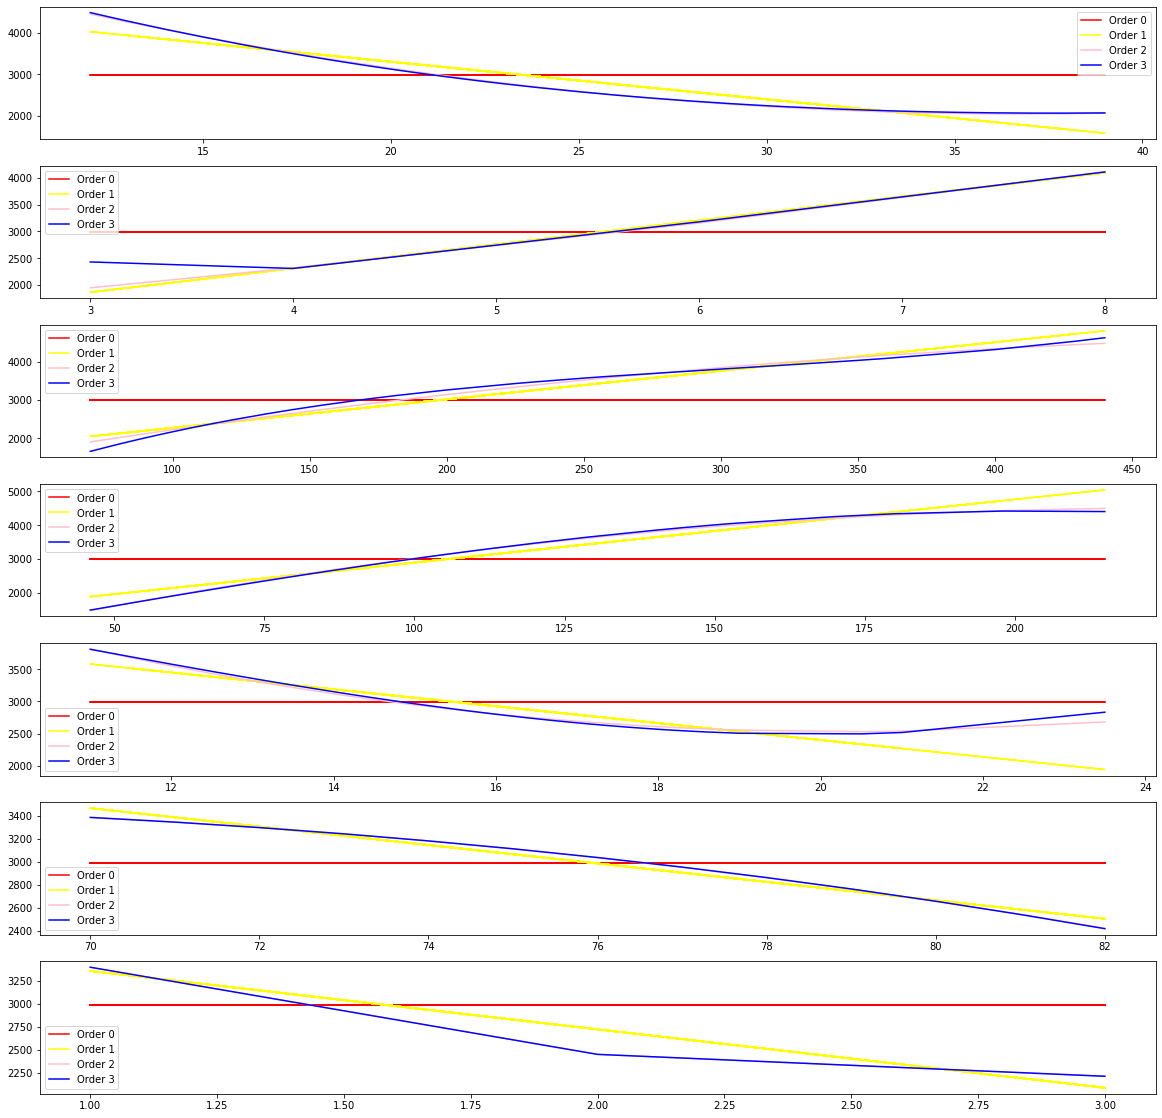

In [7]:
train = randomised[:313]
test = randomised[313:]

train.index=range(0, 313)
test.index=range(0, 79)

test_df = pd.DataFrame()
mse_values = pd.DataFrame()

for i in range(0,4):
    for key, value in df.iteritems():
        if key == "car_name" or key == "car_maker" or key == "weight" or key == "weight_categ":
            continue
        else:
            # print(key, i, len(train[key].to_list()))
            L = LinearRegression()
            fit = LinearRegression.fit(L, train[key].to_list(), train["weight"].to_list(), i)
            predict = LinearRegression.predict(L, test[key].to_list())
            mse = LinearRegression.mse(L, test["weight"].to_list(), predict)
            mse_values[key,i] = [mse]
            test_df[key, i] = predict 

print(mse_values.min())
'''
for key, value in test.iteritems():
        if key == "car_name" or key == "car_maker" or key == "weight" or key == "weight_categ":
            continue
        else:
            test_df[key] = test[key]
            ax = test_df.plot(kind = 'scatter', x = key, y=(key, 0), color = 'red')
            
            for x,y,c in zip([key, key, key],[(key, 1), (key, 2),(key, 3)], ['pink', 'green', 'yellow']):
                test_df.plot(kind='scatter', x=x, y=y, ax=ax, color=c)
'''
plt.figure()
plt.rcParams["figure.figsize"] = (20,20)
fig, axs = plt.subplots(7, 1)
cnt = -1

for key, value in test.iteritems():
        if key == "car_name" or key == "car_maker" or key == "weight" or key == "weight_categ":
            continue
        else:
            cnt = cnt + 1
            zipped_lists = zip(test[key].to_list(), test_df[key, 2].to_list())
            sorted_zipped_lists = sorted(zipped_lists)
            mylist = list(dict.fromkeys(sorted_zipped_lists))
            A, B = zip(*mylist)
            
            zipped_lists = zip(test[key].to_list(), test_df[key, 3].to_list())
            sorted_zipped_lists = sorted(zipped_lists)
            mylist = list(dict.fromkeys(sorted_zipped_lists))
            C, D = zip(*mylist)
            
            print(key)
            
            axs[cnt].plot(test[key], test_df[key, 0], color = 'red')
            axs[cnt].plot(test[key], test_df[key, 1], color = 'yellow')
            axs[cnt].plot(A, B, color = 'pink')
            axs[cnt].plot(C, D, color = 'blue')
            axs[cnt].legend(["Order 0", "Order 1", "Order 2", "Order 3"])

In this case, the second order displacement performs the best instead of the first

**2(a):**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing


le = preprocessing.LabelEncoder()
le.fit(train.weight_categ)
Y_train = le.transform(train.weight_categ)
Y_test = le.transform(test.weight_categ)

for key,value in df.iteritems(): 
    if key == "car_name" or key == "car_maker" or key == "weight" or key == "weight_categ": 
        continue
    else: 
        data = train[key].to_numpy()
        data = np.reshape(data, (-1, 1))
        log = LogisticRegression(random_state=0, max_iter=5000).fit(data, Y_train)
        predict = log.predict(test[key].to_numpy().reshape(-1, 1))
        score = log.score(test[key].to_numpy().reshape(-1, 1), Y_test)
        print(key, ": ", score)

mpg :  0.7341772151898734
cylinders :  0.8481012658227848
displacement :  0.9113924050632911
horsepower :  0.7721518987341772
acceleration :  0.5443037974683544
model_year :  0.46835443037974683
origin :  0.7088607594936709


**(b)**: calculating the precision and recall scores

In [9]:
from sklearn.metrics import precision_score, recall_score

for key,value in df.iteritems(): 
    if key == "car_name" or key == "car_maker" or key == "weight" or key == "weight_categ": 
        continue
    else: 
        data = train[key].to_numpy()
        data = np.reshape(data, (-1, 1))
        log = LogisticRegression(random_state=0, max_iter=5000).fit(data, Y_train)
        
        predict = log.predict(test[key].to_numpy().reshape(-1, 1))
        y_pred = log.predict(np.array(test.cylinders).reshape(-1, 1))
        
        print(key, ' - ')
        
        print('Precision Score: ', precision_score(Y_test, predict, average='macro',zero_division=0))
        print('Recall Score: ', recall_score(Y_test, predict, average='macro',zero_division=0))

mpg  - 
Precision Score:  0.6991582491582492
Recall Score:  0.7353658536585366
cylinders  - 
Precision Score:  0.7974747474747476
Recall Score:  0.8696476964769647
displacement  - 
Precision Score:  0.9033389450056117
Recall Score:  0.8946476964769648
horsepower  - 
Precision Score:  0.7482409063804413
Recall Score:  0.787330623306233
acceleration  - 
Precision Score:  0.33386243386243386
Recall Score:  0.48373983739837395
model_year  - 
Precision Score:  0.21428571428571427
Recall Score:  0.3343495934959349
origin  - 
Precision Score:  0.5109710550887021
Recall Score:  0.5417344173441735


**3(a)**: calculating the precision and recall scores after performing a min-max normalization 

In [10]:
from sklearn.preprocessing import MinMaxScaler

for key,value in df.iteritems(): 
    if key == "car_name" or key == "car_maker" or key == "weight" or key == "weight_categ": 
        continue
    else: 
        data = train[key].to_numpy()

        scaler = MinMaxScaler() 
        scaled_values = scaler.fit_transform(data.reshape(-1, 1))
        data=scaled_values
        
        log = LogisticRegression()
        log.fit(data, Y_train)
        
        y_pred = log.predict(Y_test.reshape(-1, 1))
        print(key, ' - ')
        print('Precision Score: ', precision_score(Y_test, y_pred, average='macro',zero_division=0))
        print('Recall Score: ', recall_score(Y_test, y_pred, average='macro',zero_division=0))
test.head()

mpg  - 
Precision Score:  0.5258215962441315
Recall Score:  0.6666666666666666
cylinders  - 
Precision Score:  0.0
Recall Score:  0.0
displacement  - 
Precision Score:  0.0
Recall Score:  0.0
horsepower  - 
Precision Score:  0.0
Recall Score:  0.0
acceleration  - 
Precision Score:  0.5258215962441315
Recall Score:  0.6666666666666666
model_year  - 
Precision Score:  0.5258215962441315
Recall Score:  0.6666666666666666
origin  - 
Precision Score:  0.19248826291079812
Recall Score:  0.3333333333333333


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,weight_categ
0,30.5,4,97.0,78.0,2190.0,14.1,77,2,volkswagen,light
1,36.1,4,91.0,60.0,1800.0,16.4,78,3,honda,light
2,19.0,6,232.0,100.0,2901.0,16.0,74,1,amc,medium
3,18.0,6,171.0,97.0,2984.0,14.5,75,1,ford,medium
4,32.0,4,144.0,96.0,2665.0,13.9,82,3,toyota,light


After max-min normalization, it seems to perform generally worse.

**4(a):** 
The following code iterates over all the relevant features for linear regression and adds a square column in the dataframe: 

In [11]:
L = []
test = test.append([{'model_year': 81, 'origin': 1, 'acceleration': 8, 'weight': 3500, 'weight_categ': 'light', 'cylinders': 4, 'horsepower': 150, 'displacement': 400, 'car_name': 'testing'}], ignore_index = True)

for key,value in train.iteritems(): 
    if key == "car_name" or key == "car_maker" or key == "weight_categ" or key[-1] == '2':
        continue
    else:
        train[key + '_2'] = train[key]**2
        # test[key + '_2'] = test[key]**2
        if(key != 'mpg'):
            L.append(key)
            L.append(key + '_2')
            
for key,value in test.iteritems(): 
    if key == "car_name" or key == "car_maker" or key == "weight_categ" or key[-1] == '2':
        continue
    else:
        test[key + '_2'] = test[key]**2
test.tail()

<ipython-input-11-b04a213af19f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[key + '_2'] = train[key]**2


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,weight_categ,mpg_2,cylinders_2,displacement_2,horsepower_2,weight_2,acceleration_2,model_year_2,origin_2
75,21.0,6,200.0,85.0,2587.0,16.0,70,1,ford,light,441.00,36,40000.0,7225.0,6692569.0,256.00,4900,1
76,26.4,4,140.0,88.0,2870.0,18.1,80,1,ford,medium,696.96,16,19600.0,7744.0,8236900.0,327.61,6400,1
77,25.8,4,156.0,92.0,2620.0,14.4,81,1,dodge,light,665.64,16,24336.0,8464.0,6864400.0,207.36,6561,1
78,34.7,4,105.0,63.0,2215.0,14.9,81,1,plymouth,light,1204.09,16,11025.0,3969.0,4906225.0,222.01,6561,1
79,NaN,4,400.0,150.0,3500.0,8.0,81,1,testing,light,NaN,16,160000.0,22500.0,12250000.0,64.00,6561,1


Now we can pass all these features stored in list L to the LinearRegression() model to train. 

In [12]:
from sklearn.linear_model import LinearRegression
x = train[L]
y = train['mpg']

linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(test[L])
pred

array([29.73671669, 34.99545038, 18.73589781, 20.49757118, 30.76346371,
       20.22442362, 12.45269028, 24.97279172, 23.37611728, 23.1513826 ,
       19.83267638, 22.72478924, 26.18636677, 26.18125009, 13.87034191,
       26.29154682, 12.37814662, 23.63446794, 27.39515583, 29.13356248,
       22.97886859, 32.28944739, 24.17622251, 14.84252488, 31.51867078,
       14.05357524, 32.63037913, 24.1807073 , 17.80228155, 27.82993845,
       15.55400576, 39.14927787, 17.24623418, 16.93522084, 17.56466904,
       23.26078911, 22.51200752, 26.50595925, 27.11564521, 22.59255712,
       24.43768781, 13.01192717, 18.22143424, 12.98371072, 36.08341402,
       27.94536989, 18.60355371, 16.59844057, 16.64933655, 21.37411046,
       23.38698759, 24.48127516, 21.8059683 , 30.94114989, 12.87457047,
       30.51698802, 26.33618823, 38.44547808, 36.62896192, 18.42868538,
       18.59833607, 28.19258166, 14.80504362, 13.72317184, 34.0630119 ,
       32.93356349, 14.16852805, 25.12834274, 29.48008131, 18.10

So we should have expected a 22.8 mpg value

In [13]:
log = LogisticRegression(max_iter=20000)
L.append('mpg')
L.append('mpg_2')
log.fit(train[L], train['weight_categ'])
test.at[79, 'mpg'] = 22.8# = 22.8
test.at[79, 'mpg_2'] = 519.84
log.predict(test[L])

array(['light', 'light', 'medium', 'medium', 'light', 'medium', 'heavy',
       'light', 'medium', 'light', 'medium', 'medium', 'medium', 'light',
       'heavy', 'light', 'heavy', 'light', 'light', 'light', 'light',
       'light', 'light', 'medium', 'light', 'heavy', 'light', 'medium',
       'medium', 'light', 'medium', 'light', 'medium', 'medium', 'medium',
       'light', 'medium', 'light', 'light', 'light', 'light', 'heavy',
       'medium', 'heavy', 'light', 'light', 'medium', 'medium', 'medium',
       'medium', 'medium', 'light', 'light', 'light', 'heavy', 'light',
       'light', 'light', 'light', 'medium', 'medium', 'light', 'medium',
       'heavy', 'light', 'light', 'heavy', 'light', 'light', 'medium',
       'light', 'light', 'light', 'medium', 'heavy', 'light', 'medium',
       'light', 'light', 'medium'], dtype=object)

So it would belong to the medium weight category. (last row represents our new object)

**Citations**

Some of the code was referred from the posted homework solution, as well as the discussion 3 notebook about Logistic Regression.